## Exploratory and Statistical Analysis from MovieLens

At the formation of Data Science in Alura online platform, one of the datasets we use is the movie ratings from the MovieLens website. In this project, we will make an exploratory analysis of this data.

In [1]:
import pandas as pd
import seaborn as sns
import scipy

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version"% sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 0.24.2 version
Using seaborn 0.9.0 version
Using scipy 1.2.1 version


## Importing movies dataset

In [2]:
# Importing dataset from movies. It can be found at https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv
filmes = pd.read_csv('movies.csv')

# Rename columns for portugese (only for the project evaluation from Alura platform)
columns = ['filmeId', 'titulo', 'generos']
filmes.columns = columns

# Setting filmeId column as index
filmes.set_index('filmeId', drop=True, inplace=True)

In [3]:
# Visualising the dataset
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
#Check if all the lines were imported
print("We imported %d movies." % len(filmes))
if(len(filmes) != 9742):
    print("ERROR! The dataset must have 9742 elements.")

We imported 9742 movies.


In [5]:
# Extracting the year and creating a new column
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Importing ratings dataset

In [6]:
# Importing ratings data. It can be found at https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv
notas = pd.read_csv('ratings.csv')

# Rename columns for portugese (only for the project evaluation from Alura platform)
columns = ['usuarioId','filmeId','nota','momento']
notas.columns = columns

In [7]:
# Visualising the dataset
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Creating a new feature: average rating per movie

In [8]:
# Creating a new calculated column with the average rating per movie
media_de_votos_por_filme = notas.groupby("filmeId").mean().nota
filmes['nota_media'] = media_de_votos_por_filme

In [9]:
# Visualizing the dataset
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pre-processing: removing the movies with less than 50 votes

In [10]:
# Calculating the total votes per movie
notas_por_filme = notas.groupby('filmeId').count().nota

In [11]:
# Creating a new column and filtering with the given condition:
# Remove the movies that has 49 or less votes
filmes['total_de_votos'] = notas_por_filme
filmes.query('total_de_votos >= 50', inplace=True)

In [12]:
#Visualizing the dataset
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Data visualization

## Average rating

- Histogram
- CDF (Cummulative Distribution Function)

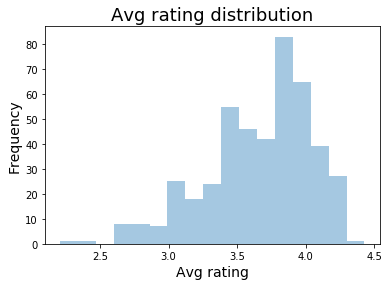

In [13]:
# Histogram
import matplotlib.pyplot as plt
plt.figure()
sns.distplot(filmes.nota_media, kde = False)
plt.title("Avg rating distribution", fontsize=18)
plt.xlabel("Avg rating", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

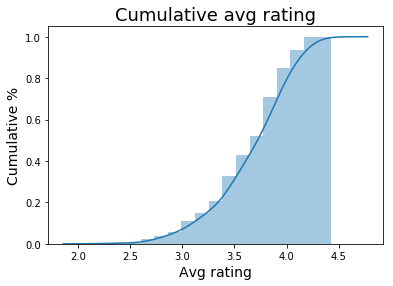

In [14]:
# CDF (Cummulative Distribution Function)
plt.figure()
sns.distplot(filmes.nota_media, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
plt.title("Cumulative avg rating", fontsize=18)
plt.xlabel("Avg rating", fontsize=14)
plt.ylabel("Cumulative %", fontsize=14)
plt.show()

## Total votes

- Histograma
- CDF (Cummulative Distribution Function)

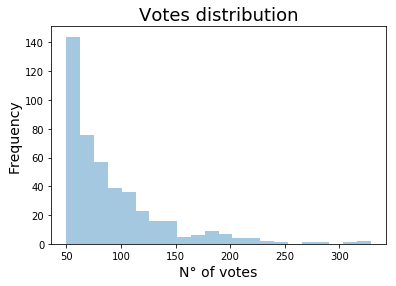

In [15]:
# Histogram
plt.figure()
sns.distplot(filmes.total_de_votos, kde = False)
plt.title("Votes distribution", fontsize=18)
plt.xlabel("N° of votes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

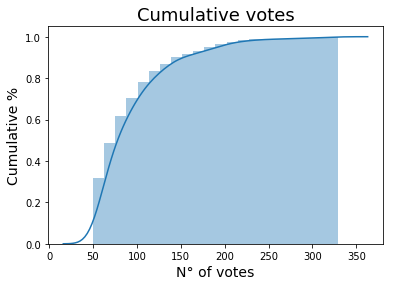

In [16]:
# CDF (Cummulative Distribution Function)
plt.figure()
sns.distplot(filmes.total_de_votos, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
plt.title("Cumulative votes", fontsize=18)
plt.xlabel("N° of votes", fontsize=14)
plt.ylabel("Cumulative %", fontsize=14)
plt.show()

## Question: 20% from the dataframe movies have a rating higher than?

In [17]:
# Solution
nota_limite_dos_20_porcento = filmes.nota_media.quantile(q=0.8)
print("20%% from the dataframe movies have a rating higher than %.2f" % nota_limite_dos_20_porcento)

20% from the dataframe movies have a rating higher than 3.99


## Pre-processing: separating gender in columns.

In [18]:
# Separating gender in a value columns: 0 = False and 1 = True.
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("We have %d distinct genders" % generos.shape[1])

We have 19 distinct genders


In [19]:
# Dropping the oringial gender columns and joining the new one created to the dataset.
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Visualization of quantity movies per gender

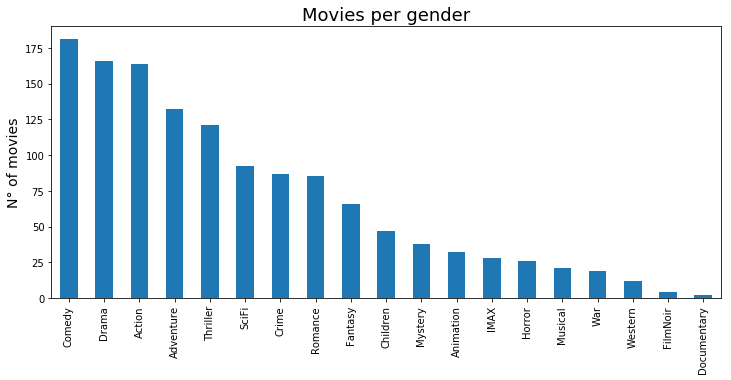

In [20]:
# Solution using matplotlib library
plt.figure(figsize=(12,5))
soma_dos_generos = generos.sum()
soma_dos_generos.sort_values(ascending=False, inplace=True)
soma_dos_generos.plot(kind='bar')
plt.title("Movies per gender", fontsize=18)
plt.ylabel("N° of movies", fontsize=14)
plt.show()

## What are the 5 gender with more movies?

In [46]:
# Solution
top5_generos_em_quantidade_de_filmes = soma_dos_generos[:5].index
print("The 5 gender with more movies are:")
print(top5_generos_em_quantidade_de_filmes)

The 5 gender with more movies are:
Index(['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller'], dtype='object')


## Visualizing votes per gender

In [22]:
# Dataframe transformation for getting votes per gender
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


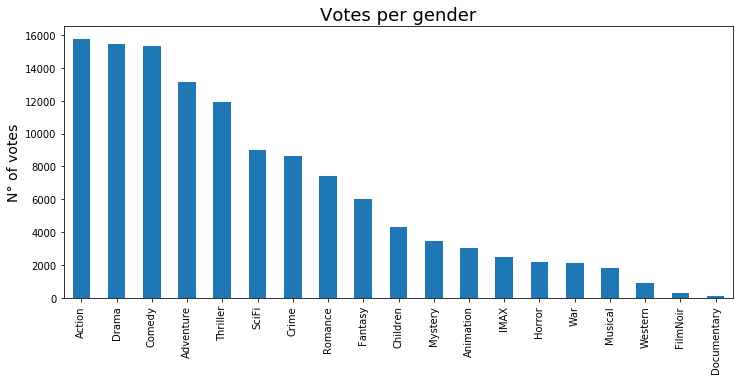

In [23]:
# Graphical solution
plt.figure(figsize=(12,5))
soma_dos_votos = votos_por_genero_por_filme.sum()
soma_dos_votos.sort_values(ascending=False, inplace=True)
soma_dos_votos.plot(kind="bar")
plt.title("Votes per gender", fontsize=18)
plt.ylabel("N° of votes", fontsize=14)
plt.show()

## Votes per movie per gender

We want to understand the amount of votes relative to the number of movies that currently exist.

For example:
- If we have 1000 votes for `Action` and 10 films of this genre, there were 100 votes per movie in that genre.
- If the `Documentary` genre has 2 movies and 500 votes, it has 250 votes per movie in this genre.

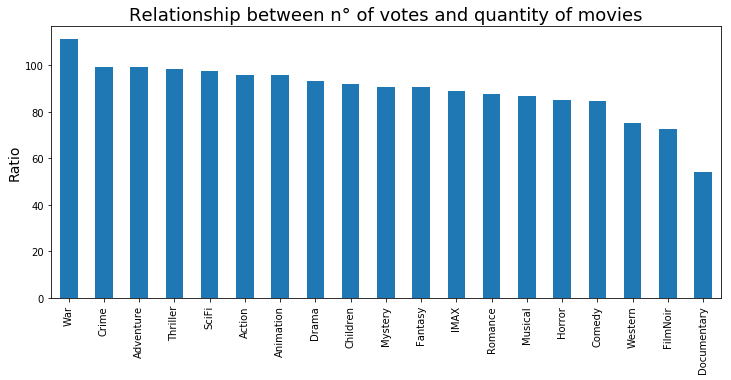

In [24]:
# Graphical solution
plt.figure(figsize=(12,5))
popularidade = soma_dos_votos / filmes.sum()[4:]
popularidade.sort_values(ascending=False,inplace=True)
popularidade.plot(kind='bar')
plt.title("Relationship between n° of votes x quantity of movies", fontsize=18)
plt.ylabel("Ratio", fontsize=14)
plt.show()

## Creating 2 boxplots in the same plot comparing the total votes from `Horror` and `Adventure`

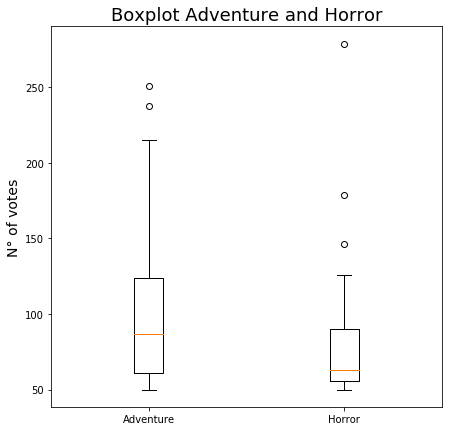

In [25]:
# Solution using matplotlib
plt.figure(figsize=(7,7))
votos_aventura = filmes.query('Adventure==1').total_de_votos
votos_horror = filmes.query('Horror==1').total_de_votos
plt.boxplot([votos_aventura, votos_horror], labels = ['Adventure', 'Horror'])
plt.title("Boxplot Adventure and Horror", fontsize=18)
plt.ylabel("N° of votes", fontsize=14)
plt.show()

## Plot boxplot for all genders

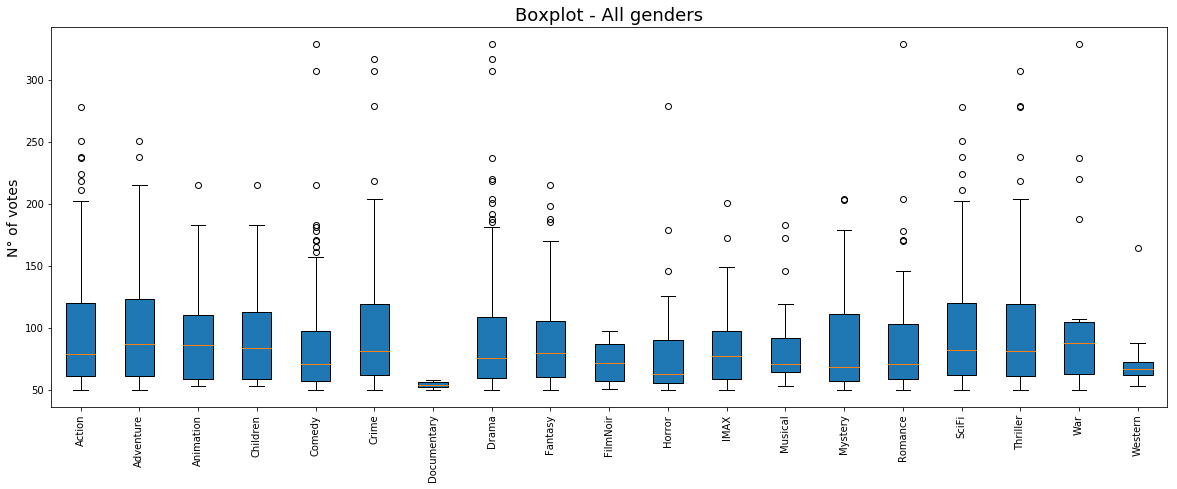

In [26]:
data = []
plt.figure(figsize=(20,7))
for genero in generos.columns:
    data.append(filmes.query(genero+'==1').total_de_votos)
plt.boxplot(data, labels=generos.columns, patch_artist=True)
plt.xticks(rotation=90)
plt.title('Boxplot - All genders', fontsize=18)
plt.ylabel('N° of votes', fontsize=14)
plt.show()

## Statistical analysis and hypothesis testing

## Comparing `Horror` and `Adventure` number of votes.

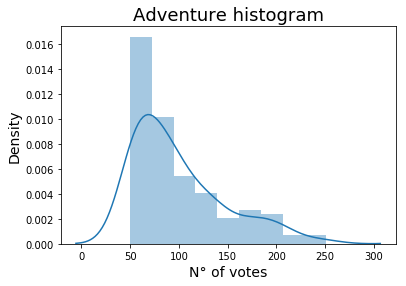

In [27]:
# Adventure gender histogram
sns.distplot(votos_aventura)
plt.title('Adventure', fontsize = 18)
plt.xlabel('N° of votes', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

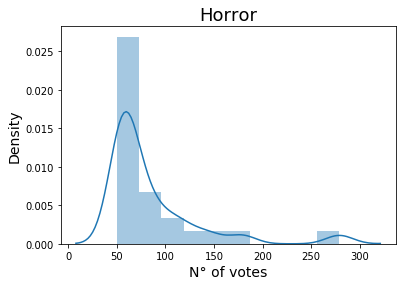

In [28]:
# Horror gender histogram
sns.distplot(votos_horror)
plt.title('Horror', fontsize = 18)
plt.xlabel('N° of votes', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [29]:
# Normality test hypothesis
alpha = 0.05
_, p_value_adventure = scipy.stats.normaltest(votos_aventura)
_, p_value_horror = scipy.stats.normaltest(votos_horror)
print("p-value Adventure: %.4f" %(p_value_adventure))
print("p-value Horror: %.4f" %(p_value_horror))

# This function tests the null hypothesis that a sample comes from a normal distribution.

if p_value_adventure < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
if p_value_horror < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p-value Adventure: 0.0000
p-value Horror: 0.0000
The null hypothesis can be rejected
The null hypothesis can be rejected


In [30]:
# Testing hypothesis to compare if both gender have statistical difference within number of votes.
from statsmodels.stats.weightstats import DescrStatsW
descr_horror = DescrStatsW(votos_horror)
descr_aventura = DescrStatsW(votos_aventura)
comparacao = descr_aventura.get_compare(descr_horror)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,14.1789,10.230,1.386,0.168,-6.028,34.386


### Conclusion:

After performing the statistical tests, it was not possible to find a statistical difference between the votes of both genders.
As a result of the analysis, the p-value found was 0.168, higher than the proposed significance (p = 0.05). We consider, then, that both genders are statistically equal in the number of votes.

## Comparing `Horror` and `Adventure` average ratings.

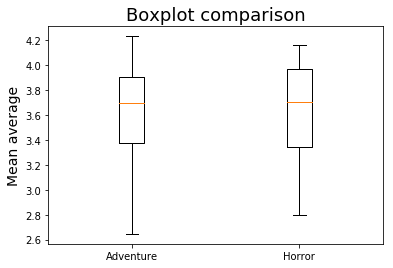

In [31]:
# Boxplot for both gender
notas_aventura = filmes.query('Adventure==1').nota_media
notas_horror = filmes.query('Horror==1').nota_media
plt.boxplot([notas_aventura, notas_horror], labels = ['Adventure', 'Horror'])
plt.title("Boxplot comparison", fontsize=18)
plt.ylabel("Mean average", fontsize=14)
plt.show()

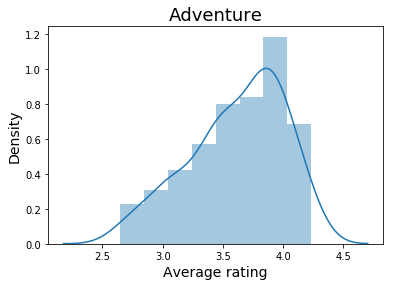

In [32]:
# Adventure gender histogram
sns.distplot(notas_aventura)
plt.title('Adventure', fontsize = 18)
plt.xlabel('Average rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

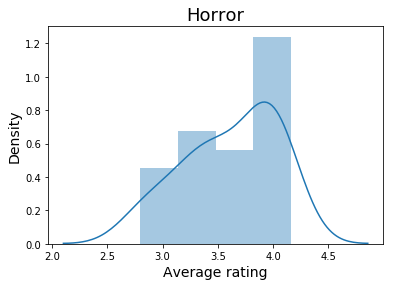

In [33]:
# Horror gender histogram
sns.distplot(notas_horror)
plt.title('Horror', fontsize = 18)
plt.xlabel('Average rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [34]:
# Normality test hypothesis
alpha = 0.05
_, p_value_adventure = scipy.stats.normaltest(notas_aventura)
_, p_value_horror = scipy.stats.normaltest(notas_horror)
print("p-value Adventure: %.4f" %(p_value_adventure))
print("p-value Horror: %.4f" %(p_value_horror))

# This function tests the null hypothesis that a sample comes from a normal distribution.

if p_value_adventure < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
if p_value_horror < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p-value Adventure: 0.0128
p-value Horror: 0.2119
The null hypothesis can be rejected
The null hypothesis cannot be rejected


In [35]:
# Testing hypothesis to compare if both gender have statistical difference within average rating.
from statsmodels.stats.weightstats import DescrStatsW
descr_horror = DescrStatsW(notas_horror)
descr_aventura = DescrStatsW(notas_aventura)
comparacao = descr_aventura.get_compare(descr_horror)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


### Conclusion:

After performing the statistical tests, it was not possible to find a statistical difference between the average ratings of both genders.
As a result of the analysis, the p-value found was 0.955, higher than the proposed significance (p = 0.05). We consider, then, that both genders are statistically equal for the average grades.

## What are the top 5 movies for the 2 most watched genders?

- Considering the 2 genders with higher number of votes.
- The top 5 movies should be classified for rating.

In [36]:
# Calculating the 2 gender with higher number of votes
votos_por_genero = soma_dos_votos[:2]
print("The two gender with higher number of votes are %s and %s" %(votos_por_genero.index[0],votos_por_genero.index[1]))

The two gender with higher number of votes are Action and Drama


In [49]:
# Top 5 movies for each of those genders
top_5_action = filmes.query("Action==1").sort_values('nota_media', ascending=False).titulo[:5].values
print("The top 5 movies for Action are:")
for index, filme in enumerate(top_5_action):
    print(index + 1, "- "+ filme)
print()
top_5_drama = filmes.query("Drama==1").sort_values('nota_media', ascending=False).titulo[:5].values
print("The top 5 movies for Drama are:")
for index, filme in enumerate(top_5_drama):
    print(index + 1, "- "+ filme)

The top 5 movies for Action are:
1 - Fight Club (1999)
2 - Dark Knight, The (2008)
3 - Princess Bride, The (1987)
4 - Star Wars: Episode IV - A New Hope (1977)
5 - Apocalypse Now (1979)

The top 5 movies for Drama are:
1 - Shawshank Redemption, The (1994)
2 - Godfather, The (1972)
3 - Fight Club (1999)
4 - Cool Hand Luke (1967)
5 - Godfather: Part II, The (1974)


## What are the 2 genders with higher correlation with the `average rating`? And the 2 genders with lowest correlation?

In [38]:
# Solution
genero_maior_corr_com_media = filmes.drop(['titulo','ano_de_lancamento','total_de_votos'], axis=1).corr().nota_media.sort_values(ascending=False)
print("The genders with the highest correlation with the average rating are: %s e %s" %(genero_maior_corr_com_media.index[1], genero_maior_corr_com_media.index[2]))
print("The genders with the lowest correlation with the average rating are: %s e %s" %(genero_maior_corr_com_media.index[-1], genero_maior_corr_com_media.index[-2]))

The genders with the highest correlation with the average rating are: Drama e Crime
The genders with the lowest correlation with the average rating are: Comedy e Action


## What are the 2 genders with higher correlation with the `total number of votes`? And the 2 genders with lowest correlation?

In [39]:
# Solution
genero_maior_corr_com_total_de_votos = filmes.drop(['titulo','ano_de_lancamento','nota_media'], axis=1).corr().total_de_votos.sort_values(ascending=False)
print("The genders with the highest correlation with the total number of votes are: %s e %s" %(genero_maior_corr_com_total_de_votos.index[1], genero_maior_corr_com_media.index[2]))
print("The genders with the lowest correlation with the total number of votes are: %s e %s" %(genero_maior_corr_com_total_de_votos.index[-1], genero_maior_corr_com_media.index[-2]))

The genders with the highest correlation with the total number of votes are: Adventure e Crime
The genders with the lowest correlation with the total number of votes are: Comedy e Action


## Graphical visualization of relationship between release year and average rating

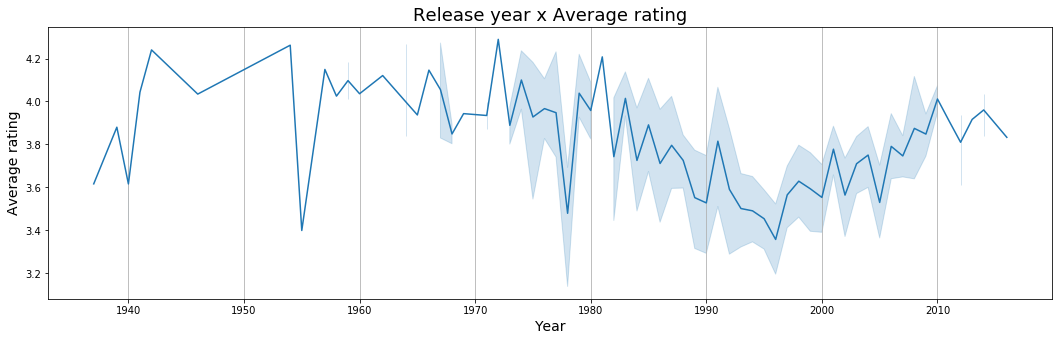

In [40]:
# Solution using seaborn
plt.figure(figsize=(18,5))
sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data=filmes)
plt.title('Release year x Average rating', fontsize = 18)
plt.ylabel('Average rating', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which='major', axis='x')
plt.show()

## Interpreting the correlation between `release year` and `average rating`

In [41]:
# Calculatin the correlation
filmes.corr().ano_de_lancamento.nota_media

-0.1591455520444448

### Conclusion: 

The variables analyzed (average rating x release year) are independent. Therefore, analyzing only correlation for causality does not make sense.
Only by analyzing the correlation can we infer that when one of the variables increases, the other decreases, and vice-versa.

## Pairplot analysis: release year x average rating x n° of votes

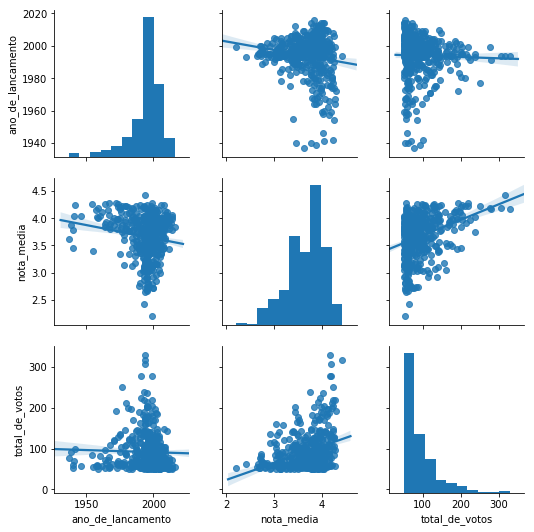

In [42]:
# Plotting the pairplot
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
sns.pairplot(infos, kind='reg')
plt.show()

## Pairplot for `Animation` gender movies

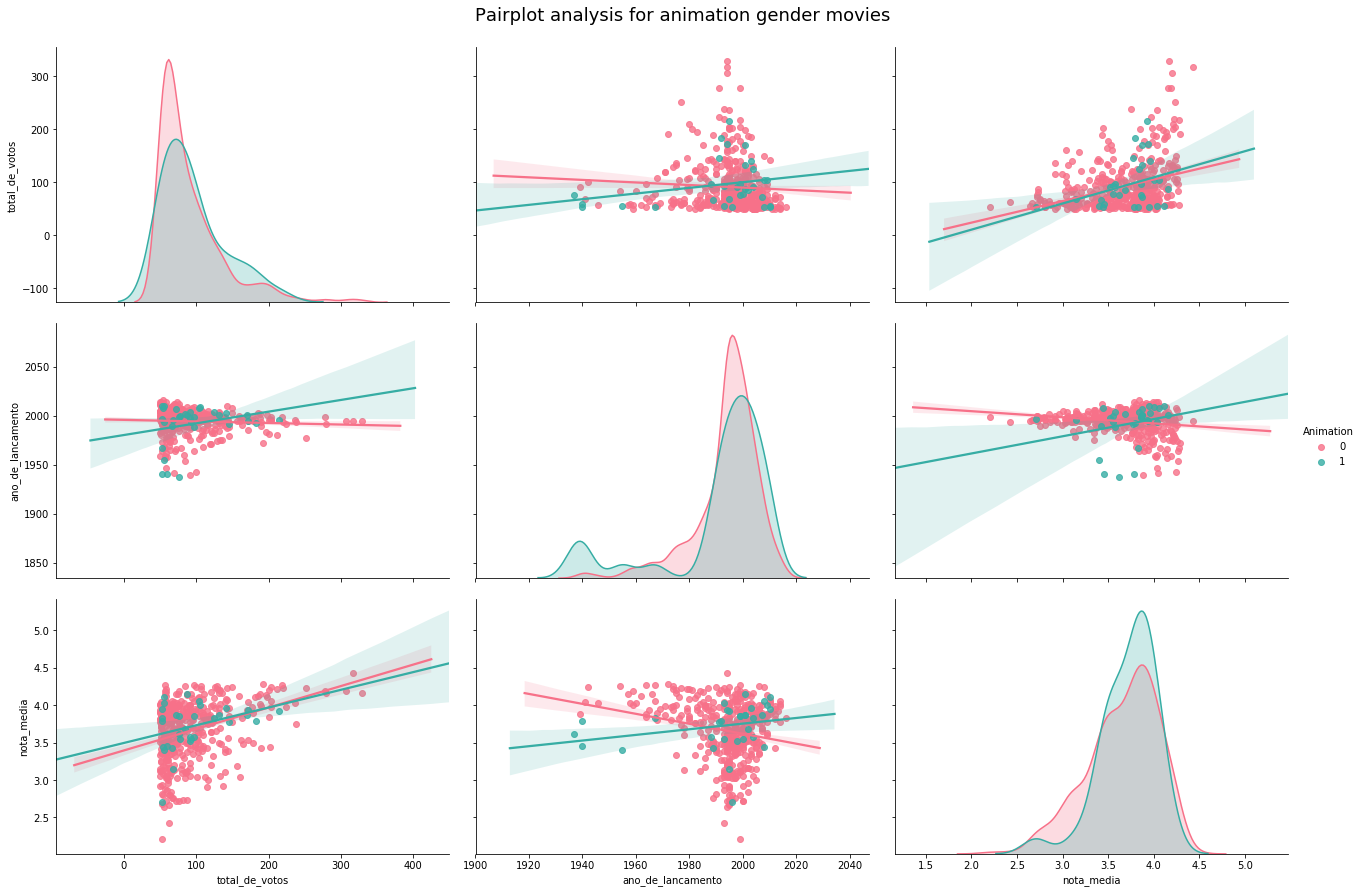

In [43]:
ax = sns.pairplot(filmes, hue = 'Animation', 
             x_vars=['total_de_votos','ano_de_lancamento','nota_media'], 
             y_vars=['total_de_votos','ano_de_lancamento','nota_media'], 
             palette='husl',
             height = 4,
             aspect = 1.5,
             kind='reg')
ax.fig.suptitle('Pairplot analysis for animation gender movies', fontsize = 18, y=1.03)
plt.show()

## Further exploratory analysis

## Number of gender per movies

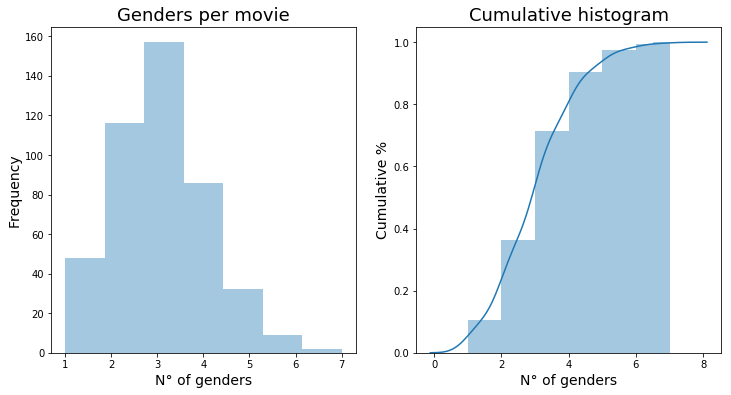

In [44]:
#Solution using seaborn 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(filmes.T[4:].sum().sort_values(ascending=False), kde=False, bins=7, ax=ax[0])
sns.distplot(filmes.T[4:].sum().sort_values(ascending=False), hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True}, ax=ax[1])
ax[0].set_title('Genders per movie', fontsize=18)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[0].set_xlabel('N° of genders', fontsize=14)

ax[1].set_title('Cumulative histogram', fontsize=18)
ax[1].set_ylabel('Cumulative %', fontsize=14)
ax[1].set_xlabel('N° of genders', fontsize=14)

plt.show()

### Conclusion: 

Most of the movies has 3 genders on their classification. 

## Statistical description of dataset

In [45]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09
